In [30]:
%matplotlib inline
import numpy as np
import sys, scipy, os
import matplotlib.pyplot as plt
import librosa
from scipy.io import wavfile

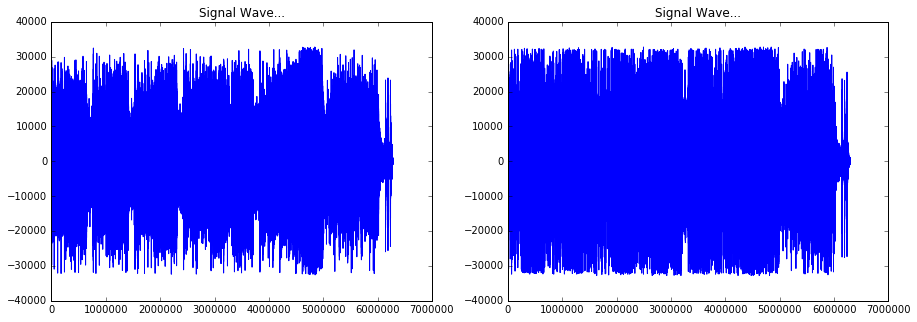

In [29]:
#import file
rate, signal = wavfile.read('../data/TheBeatles-ComeTogether.wav')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Signal Wave...')
plt.plot(signal[:,0])

plt.subplot(1, 2, 2)
plt.title('Signal Wave...')
plt.plot(signal[:,1])
plt.show()

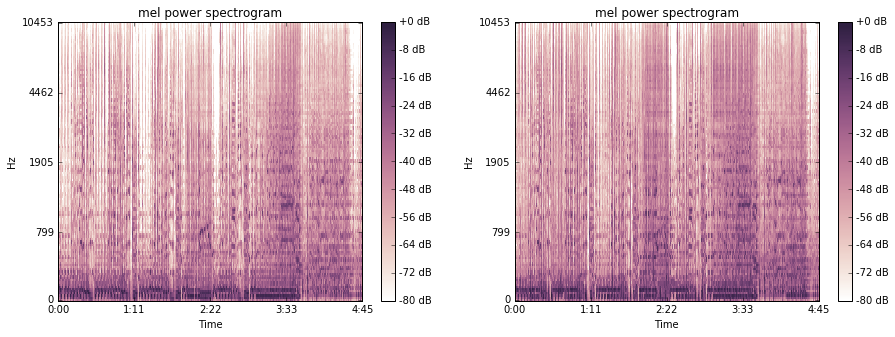

In [40]:
#Mel spectrogram
sr = rate
plt.figure(figsize=(15, 5))
for i in xrange(2):
    plt.subplot(1, 2, i+1)
    y = signal[:,i]

    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.logamplitude(S, ref_power=np.max)

    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.title('mel power spectrogram')
    plt.colorbar(format='%+02.0f dB')

plt.show()

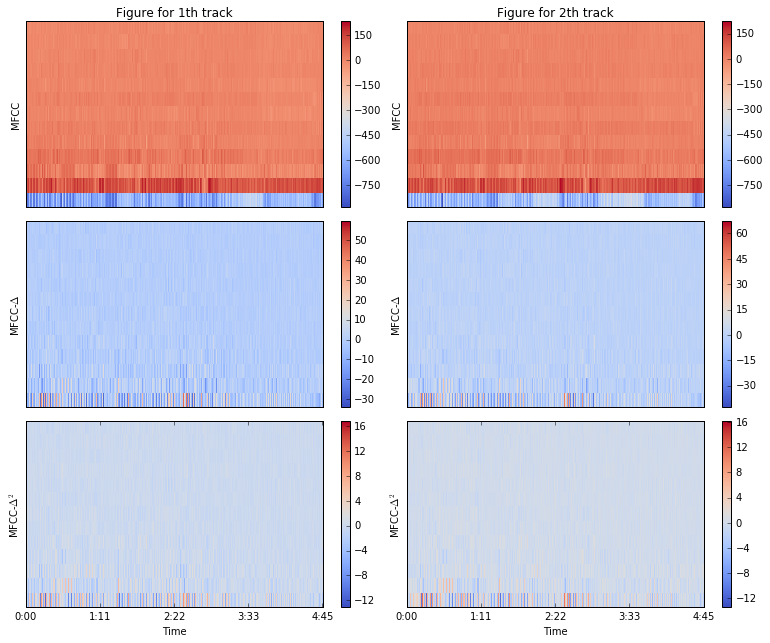

In [46]:
for i in xrange(2):
    y = signal[:,i]
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.logamplitude(S, ref_power=np.max)

    mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc  = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    plt.subplot(3,2,1+i)
    librosa.display.specshow(mfcc)
    plt.title('Figure for {0}th track'.format(i+1))
    plt.ylabel('MFCC')
    plt.colorbar()

    plt.subplot(3,2,3+i)
    librosa.display.specshow(delta_mfcc)
    plt.ylabel('MFCC-$\Delta$')
    plt.colorbar()

    plt.subplot(3,2,5+i)
    librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
    plt.ylabel('MFCC-$\Delta^2$')
    plt.colorbar()

    plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])